In [1]:
import numpy as np
import pandas as pd

# Importing the Data

In [2]:
data = pd.read_csv('C:\\Users\\Inna\\Desktop\\scripts\\Titanic\\train.csv', index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
print('The dataset provides Titanic passengers’ information. It includes', data.shape[0], 
      'records and', data.shape[1], 'features')

The dataset provides Titanic passengers’ information. It includes 891 records and 11 features


In [5]:
print('The list of the features:', list(data.columns))

The list of the features: ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


### Creating Dummy Variables 

In [6]:
# Create dummy variables for sex (1 = female, 2 = male) 
# and the port of embarktion (1 = C = Cherbourg, 2 = Q = Queenstown, 3 = S = Southampton)

In [7]:
data['Sex_num'] = data.Sex.map({'female':1, 'male':2})
data['Embarked_num'] = data.Embarked.map({'C':1, 'Q':2, 'S':3})

In [8]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,3.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,3.0


In [9]:
print('The updated dataset provides Titanic passengers’ information. It includes', data.shape[0], 
      'records and', data.shape[1], 'features')
print('The updated list of the features:', list(data.columns))

The updated dataset provides Titanic passengers’ information. It includes 891 records and 13 features
The updated list of the features: ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_num', 'Embarked_num']


### Taking Care of Missing Values

In [10]:
# Missing Values 
missingV = data.isnull().sum()
missingV.percent = missingV/len(data)*100
missingV.percent

Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age             19.865320
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin           77.104377
Embarked         0.224467
Sex_num          0.000000
Embarked_num     0.224467
dtype: float64

Observations: 
Age - 20% missing values, Cabin num - 77% missing values. 

In [11]:
threshold1 = len(data)*0.7
data.dropna(axis = 1, thresh = threshold1, inplace = True) #removes features that have more than 70% missing values
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_num,Embarked_num
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,3.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,3.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,3.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2,3.0


Observations: Cabin feature has been removes since there are more than 70% missing values

# Data Exploration

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

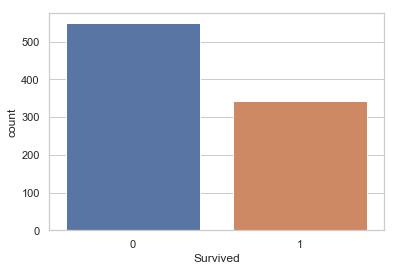

In [13]:
sns.countplot(x = 'Survived', data = data)
plt.show()
# plt.savefig('Count Plot')

In [14]:
survivorsPerc = data.where(data['Survived'] == 1).count()[0] / len(data) * 100
print('Percentage of survivors is', int(survivorsPerc))
print('Percentage of victims is', 100-int(survivorsPerc))
print('The ratio of survivors to victims is', int(survivorsPerc), ':', 100-int(survivorsPerc))

Percentage of survivors is 38
Percentage of victims is 62
The ratio of survivors to victims is 38 : 62


Observations: 
Classes are slightly inbalanced

In [15]:
data.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare,Sex_num,Embarked_num
Survived,,,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887,1.852459,2.641166
1,1.950292,28.343690,0.473684,0.464912,48.395408,1.318713,2.364706


### Observations: 
1. Ticket class (Pclass) of survived is higher than vistims' class
2. Survivors' tickets were much more expensive than vistims' (Fare)
3. There is no substantial difference between the age of survivors and victims
4. Women had more chance to survive than men



# More Depth Exploration

## 1. Gender

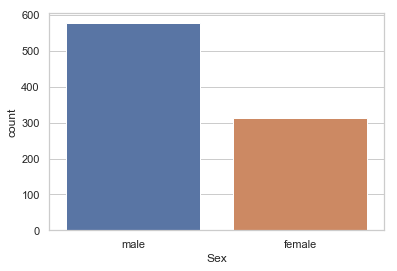

In [16]:
sns.countplot(x = 'Sex', data = data)
plt.show()

In [17]:
data.groupby('Survived').std()

,Pclass,Age,SibSp,Parch,Fare,Sex_num,Embarked_num
Survived,,,,,,,
0,0.735805,14.172110,1.288399,0.823166,31.388207,0.354968,0.710081
1,0.863321,14.950952,0.708688,0.771712,66.596998,0.466660,0.883771


In [18]:
data.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num,Embarked_num
Sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,1.0,2.416667
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,2.0,2.599653


In [19]:
data.groupby('Sex').count().Survived

Sex
female    314
male      577
Name: Survived, dtype: int64

## 2. No. of Siblings

In [20]:
data.groupby('SibSp').mean()

,Survived,Pclass,Age,Parch,Fare,Sex_num,Embarked_num
SibSp,,,,,,,
0,0.345395,2.351974,31.397558,0.185855,25.692028,1.713816,2.542904
1,0.535885,2.057416,30.089727,0.655502,44.147370,1.492823,2.440191
2,0.464286,2.357143,22.620000,0.642857,51.753718,1.535714,2.464286
3,0.250000,2.562500,13.916667,1.312500,68.908862,1.312500,3.000000
4,0.166667,3.000000,7.055556,1.500000,31.855556,1.666667,2.777778
5,0.000000,3.000000,10.200000,2.000000,46.900000,1.800000,3.000000
8,0.000000,3.000000,NaN,2.000000,69.550000,1.571429,3.000000


In [21]:
data.groupby('SibSp').count()

,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Embarked,Sex_num,Embarked_num
SibSp,,,,,,,,,,,
0,608,608,608,608,471,608,608,608,606,608,606
1,209,209,209,209,183,209,209,209,209,209,209
2,28,28,28,28,25,28,28,28,28,28,28
3,16,16,16,16,12,16,16,16,16,16,16
4,18,18,18,18,18,18,18,18,18,18,18
5,5,5,5,5,5,5,5,5,5,5,5
8,7,7,7,7,0,7,7,7,7,7,7


Observation: 
Number of siblings, sex and fare could be predictors

## 3. Age

In [22]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_num,Embarked_num
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,3.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,3.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,3.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2,3.0


In [37]:
#%matplotlib notebook - making each plot interactive
plt.close("all") # close all previously opened figures

In [24]:
age_group = data.groupby('Age').mean()
age_group.tail()

,Survived,Pclass,SibSp,Parch,Fare,Sex_num,Embarked_num
Age,,,,,,,
70.0,0.0,1.5,0.5,0.5,40.7500,2.0,3.0
70.5,0.0,3.0,0.0,0.0,7.7500,2.0,2.0
71.0,0.0,1.0,0.0,0.0,42.0792,2.0,1.0
74.0,0.0,3.0,0.0,0.0,7.7750,2.0,3.0
80.0,1.0,1.0,0.0,0.0,30.0000,2.0,3.0


In [25]:
data.groupby('Survived').count()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_num,Embarked_num
Survived,,,,,,,,,,,
0,549,549,549,424,549,549,549,549,549,549,549
1,342,342,342,290,342,342,342,342,340,342,340


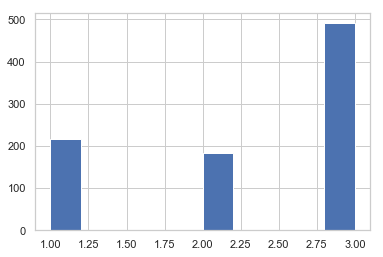

In [26]:
plt.figure(1)
data.Pclass.hist()
# it's not interesting

In [36]:
plt.figure(11)
#data.groupby('Age').hist()
plt.close(11)

Text(0,0.5,'Count')

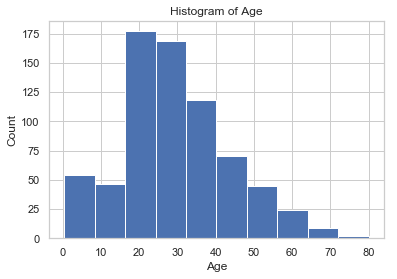

In [27]:
plt.figure(2)
data.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
#plt.savefig('hist_age')

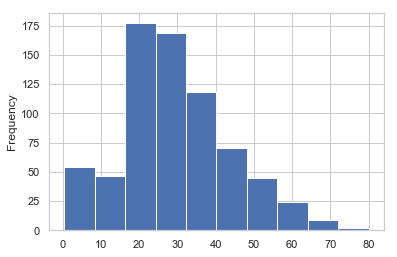

In [28]:
plt.figure(4)
data.Age.plot.hist()

Text(0,0.5,'Count')

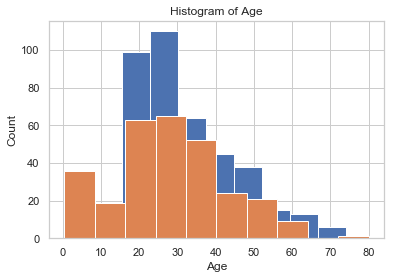

In [29]:
plt.figure(3)

survived_group = data.groupby('Survived')
survived_group.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
#plt.savefig('hist_age')

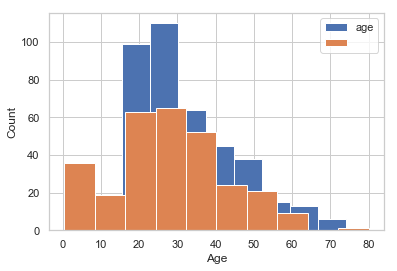

In [30]:
plt.figure(4)

survived_group = data.groupby('Survived')
survived_group.Age.hist()

#plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['age', ''])
#plt.savefig('hist_age')

In [38]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_num,Embarked_num
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,3.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,3.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,3.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2,3.0


In [45]:
survivors = data.where(data.Survived == 1)
victims = data.where(data.Survived == 0)
survivors.count()


Survived        342
Pclass          342
Name            342
Sex             342
Age             290
SibSp           342
Parch           342
Ticket          342
Fare            342
Embarked        340
Sex_num         342
Embarked_num    340
dtype: int64

In [46]:
victims.count()

Survived        549
Pclass          549
Name            549
Sex             549
Age             424
SibSp           549
Parch           549
Ticket          549
Fare            549
Embarked        549
Sex_num         549
Embarked_num    549
dtype: int64

In [51]:
victims.shape

(891, 12)

In [52]:
survivors.shape

(891, 12)

In [53]:
data.shape

(891, 12)

### Preparing data for Classification

### Oversampling for balancing classes - creating synthetic observations

In [39]:
traindata = data.copy()

# Filling missing data
traindata.fillna(traindata.Age.median(),inplace = True)
traindata.fillna(traindata.Embarked_num.mode(),inplace = True)

X = traindata.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_num', 'Embarked_num']]
y = traindata.loc[:, traindata.columns == 'Survived']

traindata.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Sex_num         0
Embarked_num    0
dtype: int64

In [42]:
X.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_num,Embarked_num
PassengerId,,,,,,,
1,3,22.0,1,0,7.2500,2,3.0
2,1,38.0,1,0,71.2833,1,1.0
3,3,26.0,0,0,7.9250,1,3.0
4,1,35.0,1,0,53.1000,1,3.0
5,3,35.0,0,0,8.0500,2,3.0
6,3,28.0,0,0,8.4583,2,2.0
7,1,54.0,0,0,51.8625,2,3.0
8,3,2.0,3,1,21.0750,2,3.0
9,3,27.0,0,2,11.1333,1,3.0


In [46]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score

### SMOTE Algorithm for balancing data

In [48]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

### RFE - Recursive Feature Elimination

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

## Implementing the model

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

NameError: name 'LogisticRegression' is not defined